In [10]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

pitch = pd.read_excel("reduced_pitch.xlsx")

In [11]:
# sqrt_vars = ['Interceptions', 'Yellow_cards', 'Transfer_value', 'Exp_contr', 'Minutes_pl_BC', 'NP_goals', 'Pen_goals', 'Pen_goals_BC', 'Assists', 'GCA_BC', 'Red_cards']

# for var in sqrt_vars: 
#     pitch[var] = pitch[var].apply(np.sqrt)

numeric_vars = ['Transfer_value', 'Exp_contr', 'Age', 'Minutes_pl', 'Minutes_pl_BC', 'NP_goals', 'Pen_goals', 'Pen_goals_BC', 'Assists', 'Interceptions', 'GCA_BC', 'Yellow_cards', 'Red_cards']
pitch[numeric_vars] = StandardScaler().fit_transform(pitch[numeric_vars])

In [21]:
ind_vars = ['Exp_contr', 'Age', 'Minutes_pl', 'Minutes_pl_BC',
       'NP_goals', 'Pen_goals', 'Pen_goals_BC', 'Assists', 'Interceptions',
       'GCA_BC', 'Yellow_cards', 'Red_cards', 'Reduced_team_from_Inter',
       'Reduced_team_from_AC Milan', 'Reduced_team_from_Juventus',
       'Reduced_team_from_Napoli', 'Reduced_team_from_Paris SG',
       'Reduced_team_from_Real Madrid', 'Reduced_team_from_Barcelona',
       'Reduced_team_from_Atlético Madrid', 'Reduced_team_from_Bayern Munich',
       'Reduced_team_from_Bor. Dortmund', 'Reduced_team_from_Chelsea',
       'Reduced_team_from_Arsenal', 'Reduced_team_from_Man City',
       'Reduced_team_from_Man Utd', 'Reduced_team_from_Liverpool', 'Reduced_country_from_Inglaterra',
       'Reduced_country_from_Francia', 'Reduced_country_from_España',
       'Reduced_country_from_Italia', 'Reduced_country_from_Alemania',
       'Reduced_country_from_Portugal', 'Reduced_country_from_Países Bajos',
       'Reduced_country_from_Argentina', 'Reduced_country_from_Brasil', 'Position_Centre-Forward',
       'Position_Left-Back', 'Position_Central Midfield',
       'Position_Centre-Back', 'Position_Right Winger',
       'Position_Attacking Midfield', 'Position_Defensive Midfield',
       'Position_Left Winger', 'Position_Second Striker',
       'Position_Left Midfield', 'Position_Right Midfield']

In [22]:
# pitch.columns

In [34]:
# pitch[ind_vars]

In [32]:
X = pitch[ind_vars]  # Asegúrate de usar las variables significativas
Y = pitch['Transfer_value']  # Variable dependiente

lasso = Lasso(alpha=0.005)  # Puedes ajustar alpha a diferentes valores
lasso.fit(X, Y)

# Imprimir los coeficientes
print("Coeficientes:", lasso.coef_)
print("Intercepto:", lasso.intercept_)

Y_pred = lasso.predict(X)

# Calcular R^2 (coeficiente de determinación)
r2_score = lasso.score(X, Y)
print(f"R^2 en los datos de prueba: {r2_score}")

# Si quieres también puedes calcular el MSE (Error Cuadrático Medio) para evaluar el rendimiento
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
print(f"RMSE en los datos de prueba: {rmse}")

from sklearn.model_selection import GridSearchCV

# Establecer un rango de valores para alpha
param_grid = {'alpha': np.logspace(-5, 5, 100)}  # Rango logarítmico de alpha

# Usar GridSearchCV para encontrar el mejor alpha
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X, Y)

# Imprimir el mejor valor de alpha y el rendimiento
print(f"Mejor alpha: {grid_search.best_params_['alpha']}")
print(f"Mejor R^2: {grid_search.best_score_}")

Coeficientes: [ 0.24380856 -0.32277248  0.0092985   0.17019336  0.19653276  0.01015716
  0.          0.07334044  0.11346436  0.27851082  0.02087893 -0.0123496
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.35759858 -0.12066076 -0.
 -0.00400372 -0.06116518  0.24536503  0.12606809  0.          0.
 -0.         -0.          0.          0.23538524 -0.          0.
  0.16900226 -0.          0.         -0.          0.        ]
Intercepto: -0.09497830793126319
R^2 en los datos de prueba: 0.4757261976984112
RMSE en los datos de prueba: 0.7240675398756589
Mejor alpha: 0.0008302175681319744
Mejor R^2: 0.46291035222510696


In [33]:
# pitch.columns
# 'Exp_contr', 'Age', 'Minutes_pl', 'Minutes_pl_BC', 'NP_goals', 'GCA_BC'

coef_names = X.columns  # tu lista original de nombres de variables
coefs = pd.Series(lasso.coef_, index=coef_names)
coefs_nonzero = coefs[coefs != 0].sort_values(ascending=False)
print(coefs_nonzero.to_string())

Reduced_country_from_Inglaterra      0.357599
GCA_BC                               0.278511
Reduced_country_from_Portugal        0.245365
Exp_contr                            0.243809
Position_Centre-Back                 0.235385
NP_goals                             0.196533
Minutes_pl_BC                        0.170193
Position_Defensive Midfield          0.169002
Reduced_country_from_Países Bajos    0.126068
Interceptions                        0.113464
Assists                              0.073340
Yellow_cards                         0.020879
Pen_goals                            0.010157
Minutes_pl                           0.009299
Reduced_country_from_Italia         -0.004004
Red_cards                           -0.012350
Reduced_country_from_Alemania       -0.061165
Reduced_country_from_Francia        -0.120661
Age                                 -0.322772


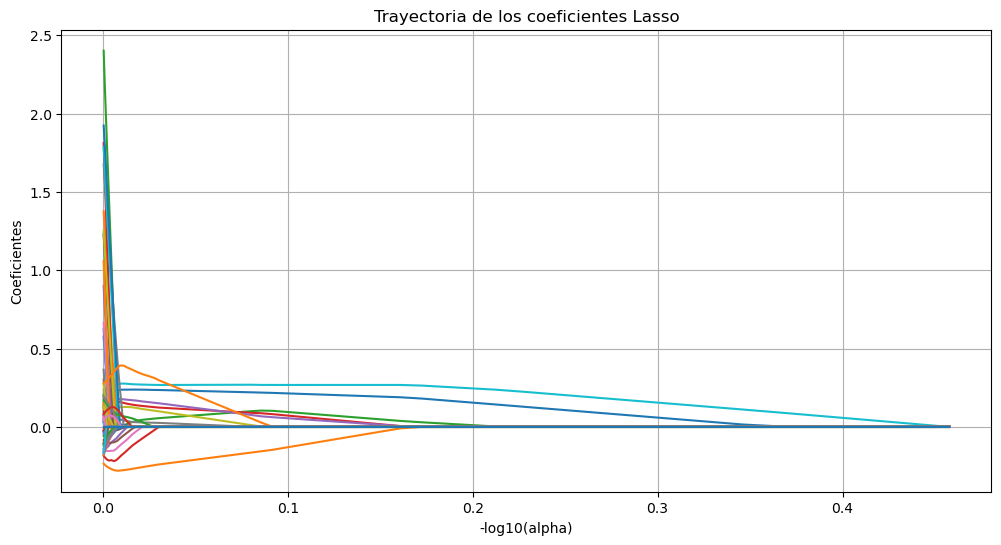

In [16]:
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tus datos ya están estandarizados:
# X -> variables predictoras, y -> variable objetivo

# Calculamos el camino de Lasso
alphas_lasso, coefs_lasso, _ = lasso_path(X, Y, alphas=None)

# Graficamos la trayectoria de los coeficientes
plt.figure(figsize=(12, 6))
# Transponemos coefs para que cada línea sea una variable
for coef in coefs_lasso:
    plt.plot(alphas_lasso, coef)

plt.xlabel('-log10(alpha)')
plt.ylabel('Coeficientes')
plt.title('Trayectoria de los coeficientes Lasso')
plt.axis('tight')
plt.grid(True)
plt.show()